In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

In [2]:
url = "spotify-2023.csv"
data = pd.read_csv(url, encoding='latin')

In [3]:
# Handle missing values
data.dropna(inplace=True) 

In [4]:
# Convert valid strings to integers and invalid strings to NaN
data['streams'] = pd.to_numeric(data['streams'], errors='coerce')

# Drop rows with NaN values in the 'streams' column
data = data.dropna(subset=['streams'])

# Convert the 'streams' column to integer type
data['streams'] = data['streams'].astype(int)

C:\Users\Akeel\anaconda3\Lib\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)


In [5]:
# Preprocess the data
features = data.drop(columns=['track_name', 'artist(s)_name'])
ct = ColumnTransformer(
    [("scaling", StandardScaler(), ['artist_count', 'released_year', 'released_month', 'released_day', 
                                    'in_spotify_playlists', 'streams', 'bpm', 'danceability_%', 'valence_%', 'energy_%',
                                    'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']),
     ("encoding", OneHotEncoder(), ['key', 'mode'])]
)
processed_data = ct.fit_transform(features)

In [6]:
# Hierarchical clustering
linked = linkage(processed_data, method='ward')

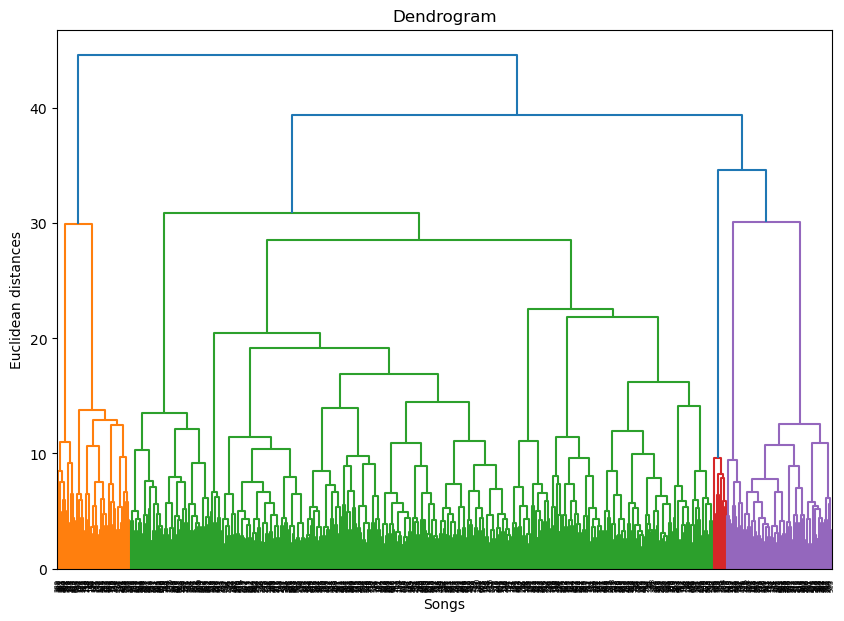

In [7]:
# Plotting the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram')
plt.xlabel('Songs')
plt.ylabel('Euclidean distances')
plt.show()

In [9]:
# Based on dendrogram decide the number of clusters: suppose we choose 5
cluster = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
data['Cluster'] = cluster.fit_predict(processed_data)


In [10]:
print(data)

                              track_name      artist(s)_name  artist_count  \
0    Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook             2   
1                                   LALA         Myke Towers             1   
2                                vampire      Olivia Rodrigo             1   
3                           Cruel Summer        Taylor Swift             1   
4                         WHERE SHE GOES           Bad Bunny             1   
..                                   ...                 ...           ...   
948                         My Mind & Me        Selena Gomez             1   
949            Bigger Than The Whole Sky        Taylor Swift             1   
950                 A Veces (feat. Feid)  Feid, Paulo Londra             2   
951                        En La De Ella  Feid, Sech, Jhayco             3   
952                                Alone           Burna Boy             1   

     released_year  released_month  released_day  in_spotify_pl